<a href="https://colab.research.google.com/github/satyampatidar/Yelp-Big-Data-Analysis/blob/main/business_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# importing packages 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# New Section

In [2]:
# load json file using pandas 
df_business = pd.read_json('/content/drive/MyDrive/yelp_dataset2/yelp_academic_dataset_business.json', lines = True) 

In [3]:
# view data 
print(df_business)

                   business_id  ...                                              hours
0       f9NumwFMBDn751xgFiRbNA  ...  {'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'...
1       Yzvjg0SayhoZgCljUJRF9Q  ...                                               None
2       XNoUzKckATkOD1hP6vghZg  ...                                               None
3       6OAZjbxqM5ol29BuHsil3w  ...  {'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ...
4       51M2Kk903DFYI6gnB5I6SQ  ...  {'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '...
...                        ...  ...                                                ...
209388  9Q0fPWAjUweoFDk0kafuzQ  ...  {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...
209389  PotiAhtDMYMNsJCzV0oLAw  ...                                               None
209390  SYa2j1boLF8DcGVOYfHPcA  ...  {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...
209391  RSSIsgO00OuWQTRoITacpA  ...  {'Monday': '0:0-0:0', 'Tuesday': '7:0-19:0', '...
209392  tOcYmewXFhQeZh3V42ymwg  ...  {'Mond

In [4]:
# Convert to CSV
df_business.to_csv("business.csv",index = False)

In [5]:
# LOADING THE DATASET AND SEEING THE DETAILS
data = pd.read_csv('/content/business.csv')
# SHAPE OF THE DATASET
print("Shape of the dataset:")
print(data.shape)
print(data.head())
# DATASET SUMMARY
data.describe(include='all')

Shape of the dataset:
(209393, 14)
              business_id  ...                                              hours
0  f9NumwFMBDn751xgFiRbNA  ...  {'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'...
1  Yzvjg0SayhoZgCljUJRF9Q  ...                                                NaN
2  XNoUzKckATkOD1hP6vghZg  ...                                                NaN
3  6OAZjbxqM5ol29BuHsil3w  ...  {'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ...
4  51M2Kk903DFYI6gnB5I6SQ  ...  {'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '...

[5 rows x 14 columns]


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
count,209393,209392,200714,209391,209393,208884,209393.000000,209393.000000,209393.000000,209393.000000,209393.000000,180348,208869,164550
unique,209393,157228,164422,1250,37,18604,NaN,NaN,NaN,NaN,NaN,104723,102494,57640
top,6kbj9mAWX4gCig-Y4WCdHA,Starbucks,5757 Wayne Newton Blvd,Las Vegas,AZ,89109,NaN,NaN,NaN,NaN,NaN,{'BusinessAcceptsCreditCards': 'True'},"Nail Salons, Beauty & Spas","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
freq,1,1184,107,31631,60803,3388,NaN,NaN,NaN,NaN,NaN,12021,1055,8992
mean,NaN,NaN,NaN,NaN,NaN,NaN,38.579934,-97.390217,3.538055,36.937505,0.806632,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,4.940448,16.718535,1.023543,123.343597,0.394940,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,21.497258,-158.025525,1.000000,3.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,33.638658,-112.269476,3.000000,4.000000,1.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,36.147408,-111.743531,3.500000,9.000000,1.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,43.611693,-79.972679,4.500000,27.000000,1.000000,NaN,NaN,NaN


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


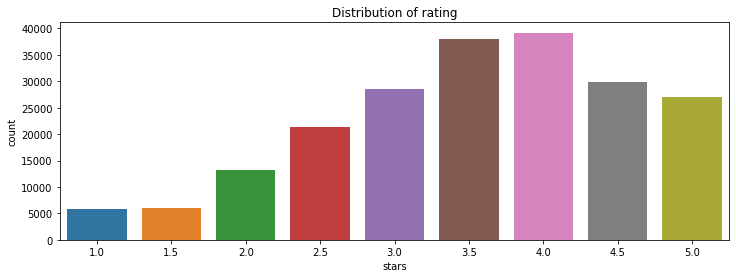

In [6]:
plt.figure(figsize=(12,4))
ax = sns.countplot(data['stars'])
plt.title('Distribution of rating');

In [7]:
df_business.stars.describe()

count    209393.000000
mean          3.538055
std           1.023543
min           1.000000
25%           3.000000
50%           3.500000
75%           4.500000
max           5.000000
Name: stars, dtype: float64

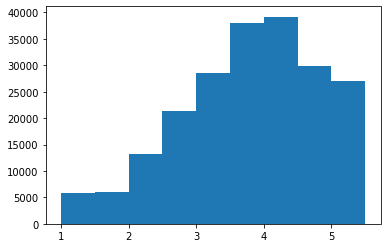

In [9]:
plt.hist(df_business.stars, bins=[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5])
plt.show()

In [10]:
df_business.review_count.describe()

count    209393.000000
mean         36.937505
std         123.343597
min           3.000000
25%           4.000000
50%           9.000000
75%          27.000000
max       10129.000000
Name: review_count, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

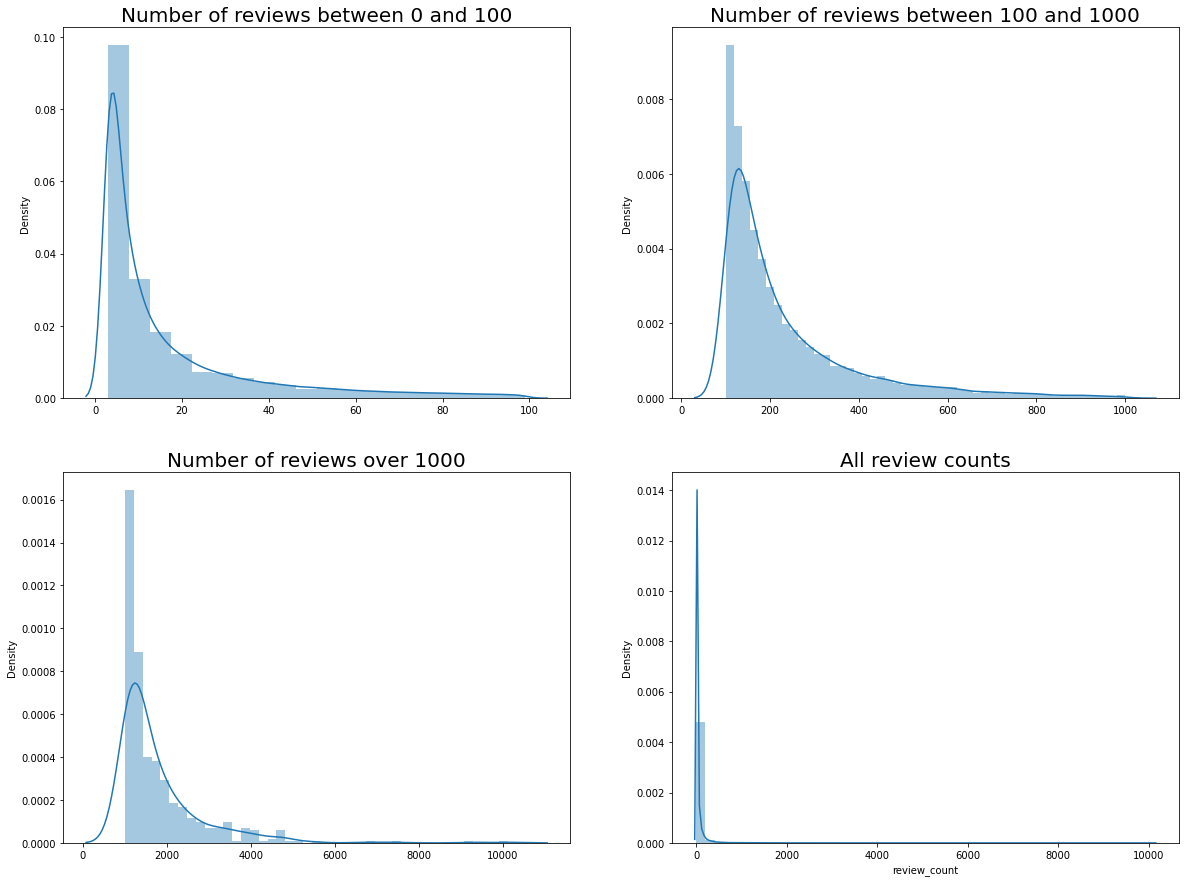

In [12]:
plt.figure(figsize=(20,15))

num_reviews = df_business.review_count

plt.subplot(221)
sns.distplot(list(filter(lambda x: x < 100, num_reviews)), bins=20)
plt.title("Number of reviews between 0 and 100", fontsize=20)
plt.subplot(222)
sns.distplot(list(filter(lambda x: x > 100 and x < 1000, num_reviews)))
plt.title("Number of reviews between 100 and 1000", fontsize=20)
plt.subplot(223)
sns.distplot(list(filter(lambda x: x > 1000, num_reviews)))
plt.title("Number of reviews over 1000", fontsize=20)
plt.subplot(224)
sns.distplot(num_reviews, bins = 50)
plt.title("All review counts", fontsize=20)
plt.show()